<a href="https://colab.research.google.com/github/7ydini/Hybrid-Modeling/blob/main/Hybrid_Modeling_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools as it

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def calculate_period_and_show(seq):
    period = len(list(it.takewhile(lambda e: e != seq[0],
                                   seq[1:]))) + 1
    print(seq[:20])
    print('Период генератора равен ', period)
    sns.set_style('darkgrid')
    sns.displot(seq, kde=True)
    plt.show()

In [3]:
def first_task():
    def create_random(a,x0,c,m):
        assert m  >= 2
        assert a  >= 0 and a  < m
        assert c  >= 0 and c  < m
        assert x0 >= 0 and x0 < m
        x_next = x0
        def rand_generator():
            nonlocal x_next
            while True:
                x_next = (a*x_next + c) % m
                yield x_next
        return rand_generator()

    # Хорошие значения
    rand_generator = create_random(a=6364136223846793005,
                                   x0=990,
                                   c=1442695040888963407,
                                   m=2**64)
    #rand_generator = create_random(a=10,
    #                               x0=90,
    #                               c=10,
    #                               m=111)
    random_seq = list(it.islice(rand_generator, 100000))
    random_sub_seq = [e % 10 for e in random_seq]
    calculate_period_and_show(random_seq)
    calculate_period_and_show(random_sub_seq)

In [4]:
def second_task():
    import random
    import math
    def rand_generator():
        while True:
            yield [random.random() for i in range(12)]


    def rand_generator_box_mueller():
        while True:
            fi = random.random()
            r = random.random()
            yield math.cos(2*math.pi*fi)*math.sqrt(-2*math.log(r))
            yield math.sin(2*math.pi*fi)*math.sqrt(-2*math.log(r))

    random_seq = list(it.islice(rand_generator(), 100000))
    random_seq_box = list(it.islice(rand_generator_box_mueller(), 100000))
    calculate_period_and_show(random_seq_box)
    calculate_period_and_show([sum(i) - 6 for i in random_seq])

[11597827514256937301, 13526896366090778688, 3892889219297109135, 4278374539565178738, 1611487347394090585, 15052406654900147700, 2875312873029364019, 12939954202348670022, 15606361462995428253, 14579839919266047720, 17925616431715512343, 4131645734384967258, 13683512988394028321, 11861147121150648092, 2795347938783370555, 16488255582720190894, 13137488224867084005, 8126727826105840272, 15674446775958099103, 4967706395280785986]
Период генератора равен  100000


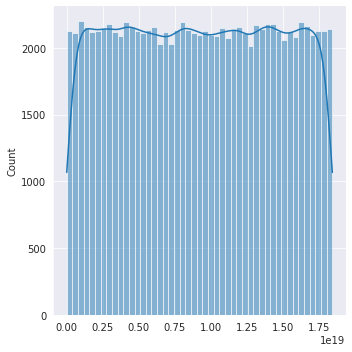

[1, 8, 5, 8, 5, 0, 9, 2, 3, 0, 3, 8, 1, 2, 5, 4, 5, 2, 3, 6]
Период генератора равен  12


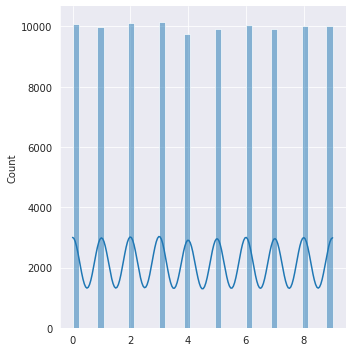

[0.4314029779445654, 0.3007318783085413, 1.055980290545499, -0.007559614780756333, 0.12247329689648043, 0.44929076836239523, -0.5414325405910719, -0.42413859334866183, -0.3477419414804489, 0.5219671583650228, 0.5402218373344954, 0.525041512750257, -0.4414547785168462, 1.7121054911855687, 1.452624727331131, 0.6879476475342897, -0.6968582853813319, -0.43639652130093437, -0.0353566565021707, -1.1087183513847856]
Период генератора равен  100000


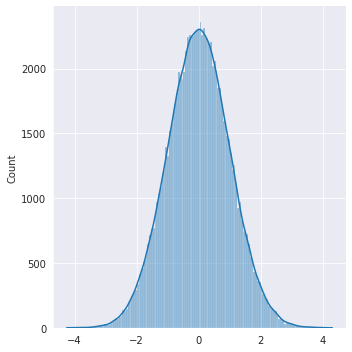

[1.4244515602271228, 0.5775559438463365, 0.7389468443216085, 0.5857370465497107, 0.311793626984441, -0.5835921173225689, 0.3882342567614554, 0.37394699264020925, 0.008940408865514726, 0.38939930840698533, -0.7788233860568532, 2.067877686317239, -0.0021496746526654675, 0.12585161340602102, 0.43707485154497405, 0.8986743147005072, 0.41408665757220664, 0.7599350083087204, 1.0056235920995356, -1.4421685185550395]
Период генератора равен  100000


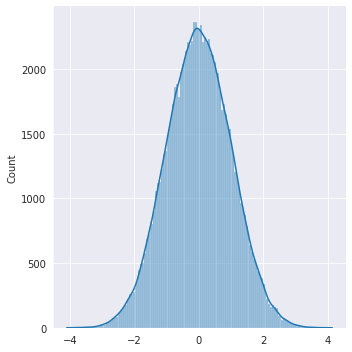

In [5]:
first_task()
second_task()